Machine Learning 2022 <br>
Week 2 - Workshop on Model Selection & Evaluation <br>
Joseph Smith <br>
Jacob Morgan <br> *Couldnt make much notes on this one, its abit rubbish*

# Machine Learning Workshop: Week 2

This week we will use sklearn package to investigate the performance of some regressors you learned in the last lecture. We will practise model evaluation, cross validation, and model selection

Please read over the whole notebook. It contains several excercises that you have to complete. 

In [1]:
# import all the packages needed for this workshop
# https://scikit-learn.org/stable/

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")
# warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn", lineno=196)

# An Example

This example shows you how to create a linear regression model for the diabeties dataset. Observe closely how the regressor is created and how the performance is evaluated. You will be asked to do similar things on another dataset used in excercises.


Load dataset and show data frame

In [2]:
from sklearn.datasets import load_diabetes
Dibs = load_diabetes()
X = Dibs.data
Y = Dibs.target
df = pd.DataFrame(X)
df.columns = Dibs.feature_names
print(df.head())

#X.shape

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


Divide dataset into  a train set and a test set, the test set size is 20 \% of the total data

In [3]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

X_train.shape,Y_train.shape,X_test.shape, Y_test.shape
#442*2/10 = 884/10

((353, 10), (353,), (89, 10), (89,))

Create linear regressor, train the model, then make predictions for the test data

In [4]:
algo = LinearRegression()
algo.fit(X_train,Y_train)
Y_pred = algo.predict(X_test)

Evaluate the model on the train set and test set, respectively

In [5]:
s1=algo.score(X_train,Y_train)
s2=algo.score(X_test, Y_test)
print(s1, s2)

0.5178869353169694 0.4975730064282289


Now do 5-fold cross validation using the cross_val_score function.  Think about which performance score you should use. Go to https://scikit-learn.org/stable/modules/model_evaluation.html and see alternative scoring parameterss.

In [6]:
# we choose R squared metric here

print("The mean of r2: ")
print(cross_val_score(algo, X, Y, scoring='r2', cv = 5).mean())

# Bashir
#results = cross_val_score(algo, X, Y, scoring='r2', cv = 5)
#results

The mean of r2: 
0.48231643590864215


Visualize the test set and the prediction in  a scatter plot

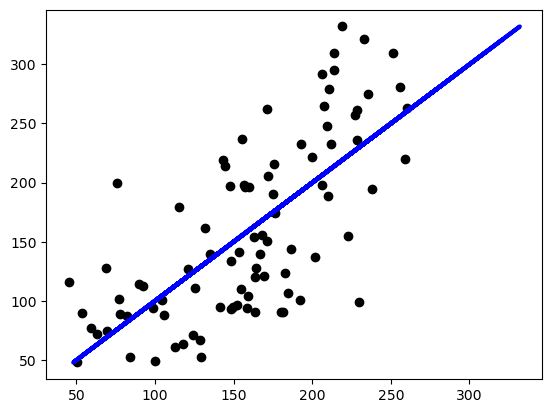

In [7]:
plt.scatter(Y_pred,Y_test, color='black')
plt.plot(Y_test, Y_test,  color='blue', linewidth=3)
plt.show()


Visualise absolute error by boxplot and density plot


<AxesSubplot:>

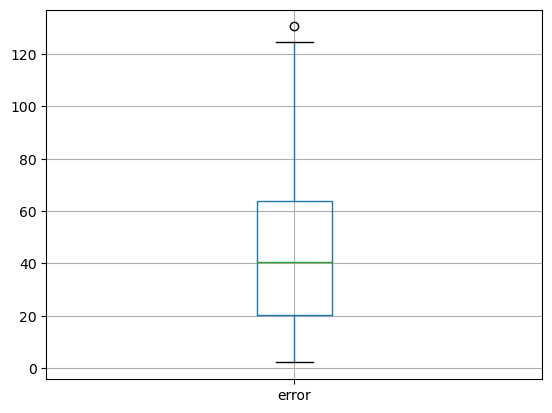

In [8]:
abs_error=abs(Y_test-Y_pred)

df = pd.DataFrame({'error':abs_error})

#df
#Understanding and interpreting box plots
#https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots
df.boxplot(grid=True)


Visualise absolute error by density plot

<AxesSubplot:xlabel='error', ylabel='Density'>

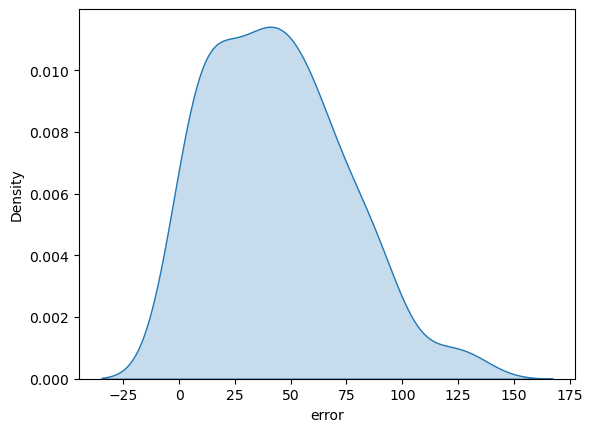

In [9]:
# density plot
import seaborn as sn
#Seaborn is a Python data visualization library based on matplotlib.
#https://seaborn.pydata.org
    
sn.kdeplot(df['error'], fill=True)
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, 
#analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
#https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot
    


---------------------------------------------------------------------------------------



# Excercises

Now you are asked to do regression on boston dataset using two different regressors

In [10]:
# load boston housing pricing dataset
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

# display basic information of boston dataset
print(boston.DESCR)
#print(boston_df.info())

# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target

input_data=boston_df.drop('Price',axis=1)

output_data=boston.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/home/jacob/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

Create a linear regressorand a ridge regressor

In [11]:
lin=LinearRegression()
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
rdg=Ridge(alpha=1.0)
#rdg=Ridge(alpha=0.1)

Create the test train split (2/3 train data, 1/3 test data), using train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.33)



*Train the 2 machine learning algorithms with the train set and test them with the test set* \
Run the data with linear regression, return R squared value


In [26]:
lin.fit(X_train, y_train)
lin.score(X_test, y_test)

0.7586871903644508

Run the data with ridge Regression, return R squared value

In [14]:
rdg.fit(X_train, y_train)
rdg.score(X_test, y_test)

0.757009565416187

Now evaluate the performance of the algorithms by finding the values for MAE, MSE, and RMSE


In [15]:
lin_y_pred=lin.predict(X_test)
rdg_y_pred=rdg.predict(X_test)
# not sure yet tbd 

print("LIN: ")
print('Mean Absolute Error:', mean_absolute_error(y_test, lin_y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, lin_y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, lin_y_pred)))

print("\n\nRIDGE: ")
print('Mean Absolute Error:', mean_absolute_error(y_test, rdg_y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, rdg_y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rdg_y_pred)))

LIN: 
Mean Absolute Error: 3.293965865668289
Mean Squared Error: 21.533606583618994
Root Mean Squared Error: 4.640431723839819


RIDGE: 
Mean Absolute Error: 3.288998258437021
Mean Squared Error: 21.683309849207486
Root Mean Squared Error: 4.656534102656984


Density plot and box plot of absolute error


<AxesSubplot:>

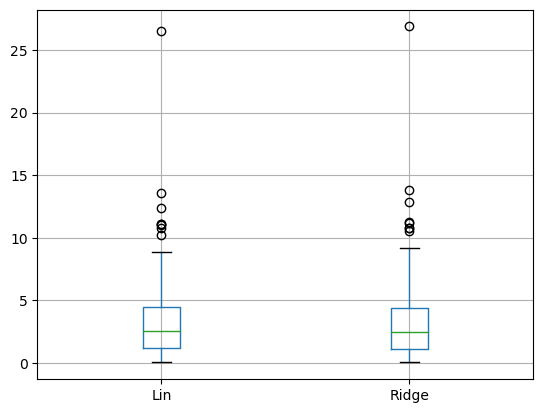

In [16]:
lin_abs_error=abs(y_test-lin_y_pred)
rdg_abs_error=abs(y_test-rdg_y_pred)


df = pd.DataFrame({'Lin':lin_abs_error,'Ridge':rdg_abs_error})
df.boxplot(grid=True)

Density plot

<AxesSubplot:ylabel='Density'>

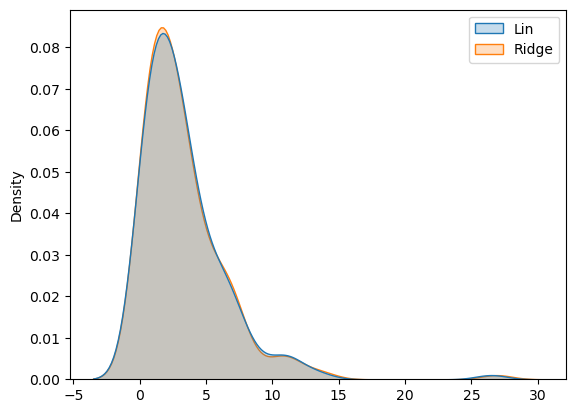

In [17]:

import seaborn as sns

sns.kdeplot(data = df , fill= True)


As seen from the above density plot, linear regression and ridge regression have almost the same distribution of absolute error values. This suggests that $\alpha=1$ used in ridge regression has little influence. What will happen if we use a big value for this parameter, say $\alpha=500000$ ?

To find out the consequences, create a new ridge regressor with $\alpha=500000$, train and test it with the same boston dataset. Compute absolute error values on the test set. Then visualise the difference between lineare regressor and the new ridge regressor in boxplot and density plot.

<AxesSubplot:>

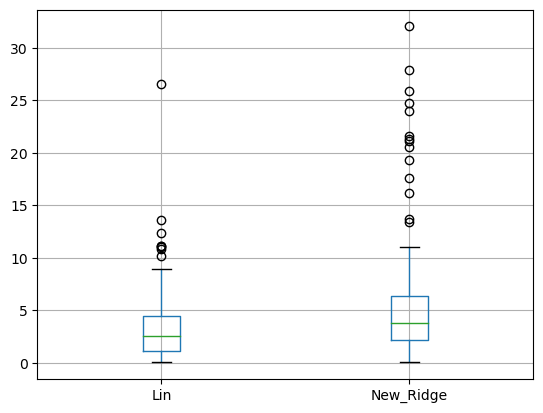

In [18]:
# create a new ridge regressor with $\alpha=500000$
new_rdg= Ridge(alpha=500000.0) 

# put your code here to train the model and predict on the test set
new_rdg.fit(X_train, y_train)
new_rdg_y_pred=new_rdg.predict(X_test)

# put your code here to visualise the abosulte errors of new_rdg and lin in box plot and density plot
new_rdg_abs_error=abs(y_test-new_rdg_y_pred)
new_df = pd.DataFrame({'Lin':lin_abs_error,'New_Ridge':new_rdg_abs_error})
new_df.boxplot(grid=True)

<AxesSubplot:ylabel='Density'>

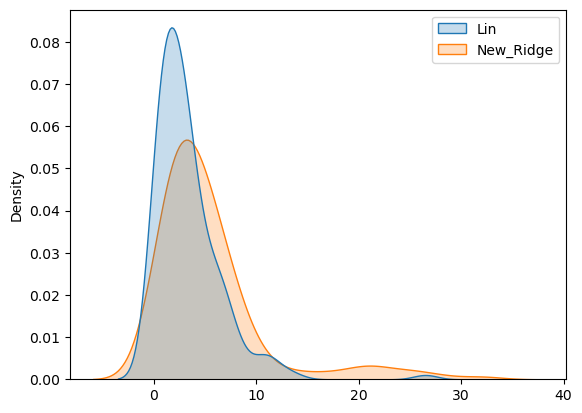

In [19]:
sns.kdeplot(data = new_df , fill= True)

# Cross validation

Scilearn contains a rich list of cross validation approaches. We are going to practise K-fold and LeaveOneOut in the exercise


1, 10-fold cross validation for the three machine learning algorithms

In [20]:
# Print the mean of r2 scores for the 2 algorithms, using the cross_val_score function

# In order to calculate our mean squared errors we are going to split our data set into 10 equally size groups (cv=10)
# We are then going to train on 9 of them, and use the final one for testing
# We will use the cross_val_score function to calculate the mean squared error
print("LIN: ")
print(cross_val_score(lin, input_data, output_data, scoring='r2', cv = 10).mean())
 
print("\n\nRIDGE:")
print(cross_val_score(rdg, input_data, output_data, scoring='r2', cv = 10).mean())



LIN: 
0.20252899006056452


RIDGE:
0.2561668703759322


2, Leave one out cross validation using leaveOneOut

In [21]:
from sklearn.model_selection import LeaveOneOut 
loo = LeaveOneOut()
# Leave one out will use every single piece of data as a test set, it will remove a value at a time, train on the rest of the data
# and then afterwards use that single piece of data to test.
results = cross_val_score(lin, input_data, output_data, scoring='neg_mean_absolute_error', cv=loo)
# print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy: -338.280% (350.463%)


#  Parameter Selection by Grid Search

A machine learning model has two types of parameters. The first type of parameters are the parameters that are learned through a machine learning model while the second type of parameters are the hyper parameter that we pass to the machine learning model.

"In statistics and machine learning, lasso (least absolute shrinkage and selection operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces." Wikipedia

The LASSO and Ridge regressors both have a parameter $\alpha$. This kind of parameters are known as hyper parameters.

Normally we randomly set the value for these hyper parameters and see what parameters result in best performance. However randomly selecting the parameters for the algorithm can be exhaustive.

Also, it is not easy to compare performance of different algorithms by randomly setting the hyper parameters because one algorithm may perform better than the other with different set of parameters. And if the parameters are changed, the algorithm may perform worse than the other algorithms.

Therefore, instead of randomly selecting the values of the parameters, a better approach would be to develop an algorithm which automatically finds the best parameters for a particular model. Grid Search is one such algorithm.

Practical machine learning: Ridge Regression vs. Lasso
https://hackernoon.com/practical-machine-learning-ridge-regression-vs-lasso-a00326371ece

Regularization: Ridge, Lasso and Elastic Net
https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net


Apply Grid Search to the following parameter structure to identify the best $\alpha$ value from [0.01, 0.05, 0.1, 0.5, 1] for the Ridge regressor

grid_param = {
    'alpha':  [0.01, 0.05, 0.1, 0.5, 1] , 
}

In [22]:
grid_param = {
    'alpha':  [0.01, 0.05, 0.1, 0.5, 1],
}

In [23]:
# create grid search engine using the GridSearchGV
# GridSearchCV is a way of calculating which alpha parameters work best for your estimator, here we're
# giving it the ridge regressor from earlier, and a set of test alpha parameters and then fitting it to our training set
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=rdg,
                     param_grid=grid_param,
                     scoring='r2',
                     cv=5,
                     n_jobs=-1)

#class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)[source]¶
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    

In [24]:
# apply grid search on the whole boston dataset
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1]}, scoring='r2')

In [25]:
# obtain the best alpha value
best_parameters = gd_sr.best_params_
print(best_parameters)

{'alpha': 0.01}
